# Estudo de caso: construindo uma rede com dados do Spotify

Neste notebook vamos utilizar os dados do Spotify do ponto de vista de uma análise de rede. Vamos fazer uma rede de concorrência utilizando os nomes dos artistas das músicas de playlists encontradas num dataset. Para isso foi usado a linguagem de programação Python e pacotes necessários.

In [ ]:
# always check the current version in github
!pip install networkx==2.6.2

In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

## Construção da Rede

Para a construção da rede foi utilizado o Spotify Million Playlist Dataset, que contém 1.000.000 playlists criadas por usuários na plataforma Spotify. O dataset completo está disponível neste [link](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge). O MPD contém um milhão de listas de reprodução geradas pelo usuário. Essas listas de reprodução foram criadas durante o período de janeiro de 2010 a outubro de 2017. 

O arquivo json 'mpd.slice.0-999' possui informações de 1000 playlists numeradas de 0 a 999.

Parte do código para leitura do arquivo json onde estão as informações das playlists foram tiradas deste repositório: https://github.com/vaslnk/Spotify-Song-Recommendation-ML/blob/master/EDA.ipynb 

In [ ]:
#Read in json splice and transform into a playlist level dataframe
path = 'data/mpd.slice.0-999.json'
d = json.load(open(path, 'r'))
this_slice = pd.DataFrame.from_dict(d['playlists'], orient='columns')

In [4]:
#Turn playlist level dataframe into song level dataframe
song_playlist_array = []
for index, row in this_slice.iterrows():
    for track in row['tracks']:
        song_playlist_array.append([track['artist_name'], track['track_name'], row['pid']])
song_playlist = pd.DataFrame(song_playlist_array, columns=['artist_name', 'track_name', 'pid'])

print(song_playlist.shape)
song_playlist.head(10) 

(67503, 3)


,artist_name,track_name,pid
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),0
1,Britney Spears,Toxic,0
2,Beyoncé,Crazy In Love,0
3,Justin Timberlake,Rock Your Body,0
4,Shaggy,It Wasn't Me,0
5,Usher,Yeah!,0
6,Usher,My Boo,0
7,The Pussycat Dolls,Buttons,0
8,Destiny's Child,Say My Name,0
9,OutKast,Hey Ya! - Radio Mix / Club Mix,0


A rede de coocorrência vai ser feita com os vértices representando os artistas e uma aresta é adicionada entre dois artistas se eles se encontram na mesma lista de reprodução.
Utilizando o dados  das playlists, adicionamos uma aresta entre cada cada artista presente em uma determinada playlist.

In [5]:
graph = nx.Graph() 

for pid in song_playlist["pid"].unique():
  if(pid > 99): # first 100 playlists
      break

  artist_list = []
  for index, row in song_playlist.loc[song_playlist["pid"] == pid].iterrows():
      artist_list.append(row["artist_name"])

  unique_artists = np.unique(artist_list)

  for i in range(0, len(unique_artists)):
      for j in range(i+1, len(unique_artists)):
          if(graph.has_edge(unique_artists[i], unique_artists[j])):
              graph[unique_artists[i]][unique_artists[j]]["weight"] += 1
          else:
              graph.add_edge(unique_artists[i], unique_artists[j], weight = 1)


In [6]:
print("O grafo possui {} nós e {} arestas".format(len(graph), nx.number_of_edges(graph)))

O grafo possui 2062 nós e 87997 arestas


Agora vamos analisar umas métricas importantes para análise de redes.

Mostrando os números de componentes do grafo e o número de nodos de cada componente:

In [ ]:
for component in list(nx.connected_components(graph)):
    print(len(component))

2008
40
9
5


Como podemos ver há 4 componentes. Na teoria dos grafos, um componente de um grafo não direcionado é um subgrafo conectado que não faz parte de nenhum subgrafo conectado maior. 

In [ ]:
# utilizando o maior componente
g = nx.subgraph(graph, list(nx.connected_components(graph))[0])

## Algumas métricas que podem ser analisadas num grafo:

Excentricidade do grafo – 
É definida como a distância máxima de um vértice a outro vértice. A distância máxima de um vértice a todos os outros vértices é considerada como a excentricidade do vértice. 

Diâmetro do grafo – 
O diâmetro do grafo é a distância máxima entre o par de vértices. Também pode ser definida como a distância máxima entre o par de vértices. É a excentricidade máxima.

Raio do grafo – Um raio do grafo só existe se tiver o diâmetro. O mínimo entre todas as distâncias máximas entre um vértice e todos os outros vértices é considerado como o raio do Grafo G. 

Centro do grafo – 
É composto por todos os vértices cuja excentricidade é mínima. 

In [ ]:
# the diameter of networks is the maximum eccentricy
print("Diâmetro da rede (g): {}".format(nx.diameter(g)))

Diâmetro da rede (g): 6


In [ ]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
nx.periphery(g)

['Lil Pump',
 'Trippie Redd',
 'Smokepurpp',
 'Tokyo Police Club',
 'Foals',
 'Voxtrot',
 'Tegan and Sara',
 'Kelly Price',
 'Florida A&M University Gospel Choir',
 'Norman Hutchins',
 'Dottie Peoples & The Peoples Choice Chorale',
 'Tasha Cobbs Leonard',
 'Donald Lawrence',
 'Benita Washington',
 'The Warriors, DR.Charles G. Hayes',
 'The New Life Community Choir',
 'Donnie McClurkin',
 'Shekinah Glory Ministry',
 'Smokie Norful',
 'Tye Tribbett',
 'Richard Smallwood',
 'Kirk Franklin',
 'Tamela Mann',
 'The Rance Allen Group',
 'CeCe Winans',
 'J Moss',
 'Kurt Carr & The Kurt Carr Singers',
 'Max Minelli',
 'Young Bleed',
 'Caye',
 'Berhana',
 'Daniel Caesar',
 'Abhi//Dijon',
 'Tontario',
 'Masego',
 'Calle 13',
 'Xtreme',
 'A.B. Quintanilla III',
 'Camila',
 'Aventura',
 'Maná',
 'Santana',
 'Nina Sky',
 'N.O.R.E.',
 'Celia Cruz',
 'Young Boss',
 'Ivy Queen',
 'Enrique Iglesias',
 'Boy Wonder Chosen Few',
 'Tito "El Bambino"',
 'Elvis Crespo',
 'Monchy & Alexandra',
 'Julieta Venega

In [ ]:
# the radius of a network is the minimum eccentricity
print("Raio da rede (g): {}".format(nx.radius(g)))

Raio da rede (g): 3


In [ ]:
# the center of a network is a set all nodes whose eccentricity equal the radius
nx.center(g)

['Lykke Li',
 'The Black Keys',
 'Ryan Adams',
 'David Bowie',
 'Mary Lambert',
 'Dan Auerbach',
 'Bob Dylan',
 'Milo Greene',
 'Langhorne Slim',
 'Phosphorescent',
 'The Civil Wars']

## Medidas de centralidade

Na teoria dos grafos e na análise de redes , os indicadores de centralidade atribuem números ou classificações aos nós dentro de um grafo correspondente à sua posição na rede. 

### Degree

A centralidade de grau é definida como o número de links incidentes sobre um nó (ou seja, o número de ligações que um nó possui).

In [ ]:
degree_dict = nx.degree_centrality(g)

degree_list = []

for key, value in dict(degree_dict).items():
    degree_list.append([key, value])
degree_df = pd.DataFrame(degree_list, columns=["artist_name", "degree"])

degree_df = degree_df.sort_values(by="degree", ascending=False)
degree_df.head(10)

,artist_name,degree
174,Rihanna,0.336323
181,Ed Sheeran,0.311410
313,Drake,0.260090
384,Major Lazer,0.259591
732,Maroon 5,0.252616
22,Jason Derulo,0.246637
831,The Chainsmokers,0.242152
24,Miley Cyrus,0.235177
381,The Weeknd,0.229198
28,Justin Bieber,0.227205


Os 10 artistas com maior degree centrality é mostrado acima, sendo artistas populares mundialmente.

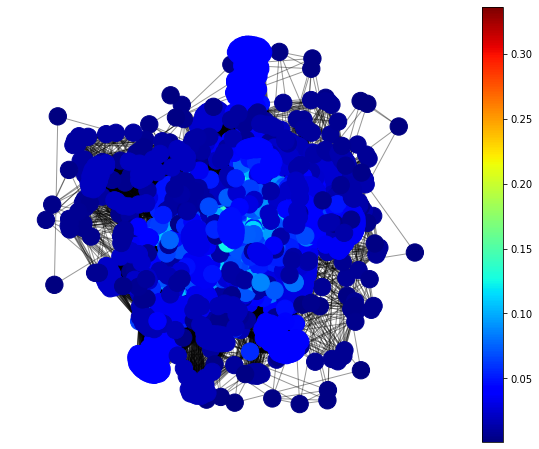

In [ ]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(degree_dict).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

No grafo acima os vértices são coloridos de acordo com o valor de centralidade de grau, nessa visualização grande parte dos vértices possuem grau de valores próximos e a maior parte também possuem valores baixos.

### Closeness Centrality

Em um grafo conectado, a centralidade de proximidade (ou proximidade) de um nó é uma medida de centralidade em uma rede, calculada como a recíproca da soma do comprimento dos caminhos mais curtos entre o nó e todos os outros nós do grafo. Assim, quanto mais central for um nó, mais próximo ele estará de todos os outros nós.

In [ ]:
closeness_dict = nx.closeness_centrality(g)

closeness_list = []

for key, value in dict(nx.closeness_centrality(g)).items():
    closeness_list.append([key, value])
closeness_df = pd.DataFrame(closeness_list, columns=["artist_name", "closeness"])

closeness_df = closeness_df.sort_values(by="closeness", ascending=False)
closeness_df.head(10)

,artist_name,closeness
174,Rihanna,0.587701
181,Ed Sheeran,0.576724
313,Drake,0.561399
732,Maroon 5,0.559209
24,Miley Cyrus,0.555033
22,Jason Derulo,0.554420
381,The Weeknd,0.551980
28,Justin Bieber,0.550768
218,Sia,0.549411
182,Bruno Mars,0.546569


Na lista acima podemos ver os 10 artistas com maior centralidade de proximidade no grafo.

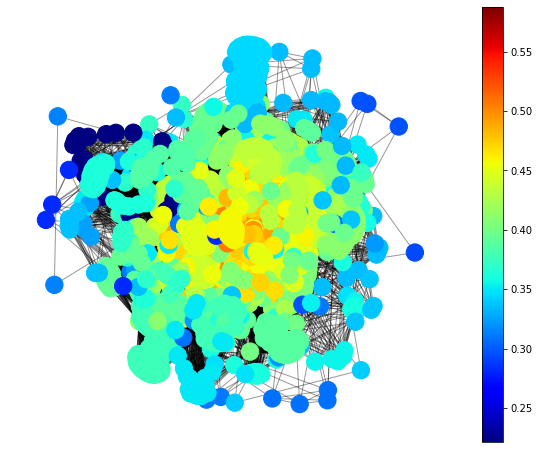

In [ ]:
# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(closeness_dict).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

No grafo acima os vértices são coloridos de acordo com o valor de centralidade de proximidade, nessa visualização há um pouco mais de variabilidade de cores, com vértices com valores entre 0.35 e 0.45 aparecendo com maior destaque.

### Betweenness Centrality

A centralidade de intermediação é uma maneira de detectar a quantidade de influência que um nó tem sobre o fluxo de informações em um grafo. É frequentemente usado para encontrar nós que servem como uma ponte de uma parte de um grafo para outra.

O algoritmo calcula os caminhos mais curtos não ponderados entre todos os pares de nós em um grafo. Cada nó recebe uma pontuação, com base no número de caminhos mais curtos que passam pelo nó. Os nós que se encontram com mais frequência nos caminhos mais curtos entre outros nós terão pontuações de centralidade de intermediação mais altas.

In [ ]:
betweenness_dict = nx.betweenness_centrality(g)

betweenness_list = []

for key, value in dict(betweenness_dict).items():
    betweenness_list.append([key, value])
betweenness_df = pd.DataFrame(betweenness_list, columns=["artist_name", "betweenness"])

betweenness_df = betweenness_df.sort_values(by="betweenness", ascending=False)
betweenness_df.head(10)

,artist_name,betweenness
173,Pitbull,0.030993
174,Rihanna,0.029931
690,Aretha Franklin,0.027527
381,The Weeknd,0.024506
181,Ed Sheeran,0.024465
654,Bob Dylan,0.023319
53,Queen,0.021715
384,Major Lazer,0.021252
313,Drake,0.020266
1063,Marvin Gaye,0.019518


Na lista acima podemos ver os 10 artistas com maior centralidade de intermediação no grafo.

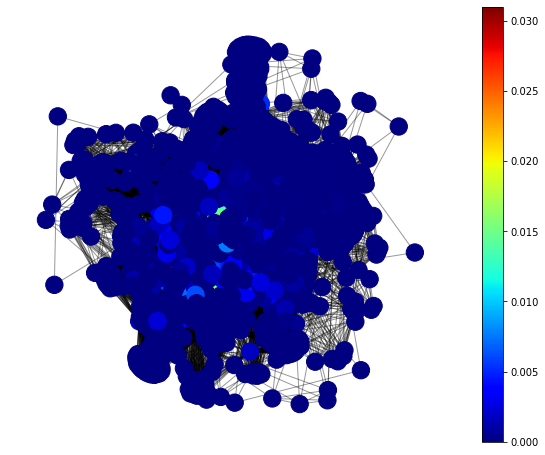

In [ ]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(betweenness_dict).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

### Eigenvector Centrality

Eigenvector Centrality é uma medida da influência de um nó em uma rede. Relacionamentos originados de nós de alta pontuação contribuem mais para a pontuação de um nó do que conexões de nós de baixa pontuação. Uma pontuação de autovetor alta significa que um nó está conectado a muitos nós que possuem pontuações altas.

In [ ]:
eigenvector_dict = nx.eigenvector_centrality(g)

eigenvector_list = []

for key, value in dict(eigenvector_dict).items():
    eigenvector_list.append([key, value])
eigenvector_df = pd.DataFrame(eigenvector_list, columns=["artist_name", "eigenvector"])

eigenvector_df = eigenvector_df.sort_values(by="eigenvector", ascending=False)
eigenvector_df.head(10)

,artist_name,eigenvector
174,Rihanna,0.127128
181,Ed Sheeran,0.120606
22,Jason Derulo,0.106616
831,The Chainsmokers,0.104918
24,Miley Cyrus,0.101455
732,Maroon 5,0.098418
28,Justin Bieber,0.098085
993,David Guetta,0.094963
384,Major Lazer,0.094156
313,Drake,0.093166


Na lista acima podemos ver os 10 artistas com maior centralidade do autovetor no grafo.

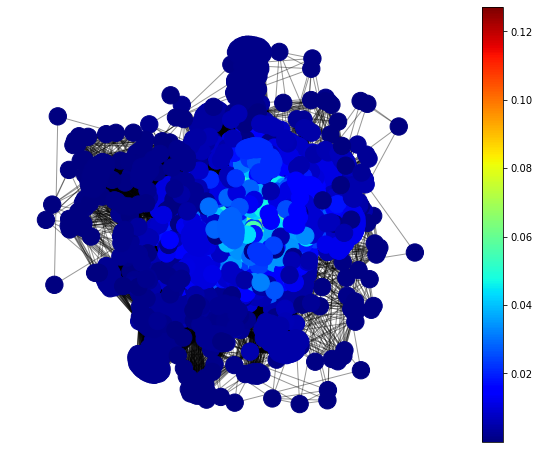

In [ ]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(g,seed=123456789,k=0.3)
# color of nodes
color = list(dict(eigenvector_dict).values())

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

## Análise Bivariada

In [ ]:
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

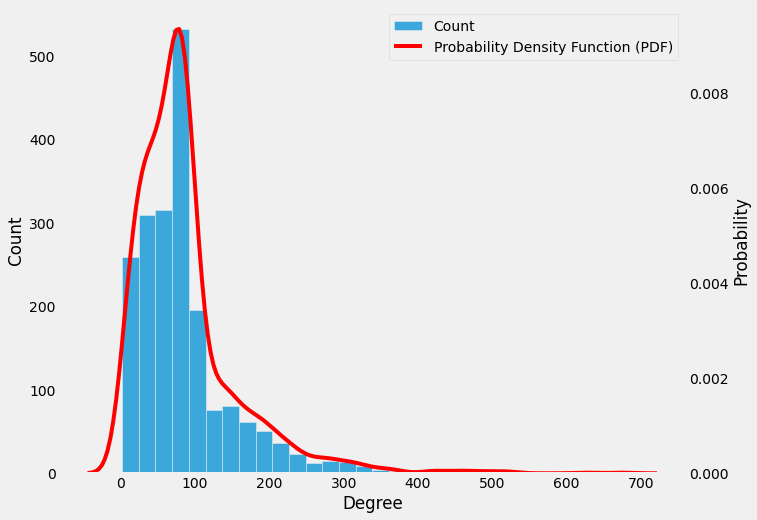

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=30,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

Uma forma interessante de identifcar propriedades de centralidade de uma rede mais complexa é através da PDF (Probability Density Function).
No eixo de x do gráfico tem o grau, no eixo y tem a quantidade de ocorrências daquele grau. É possível observar que existe mais ou menos mais de 500 nós com grau 100. A maioria dos nós da rede possui grau 200 ou menos.
Nessa implementação o PDF pode ser chamado também de KDE (kernel density estimation). O eixo y do lado direito e esquerdo estão sendo usados, no direito sendo a probabilidade que é a curva em vermelho no gráfico.

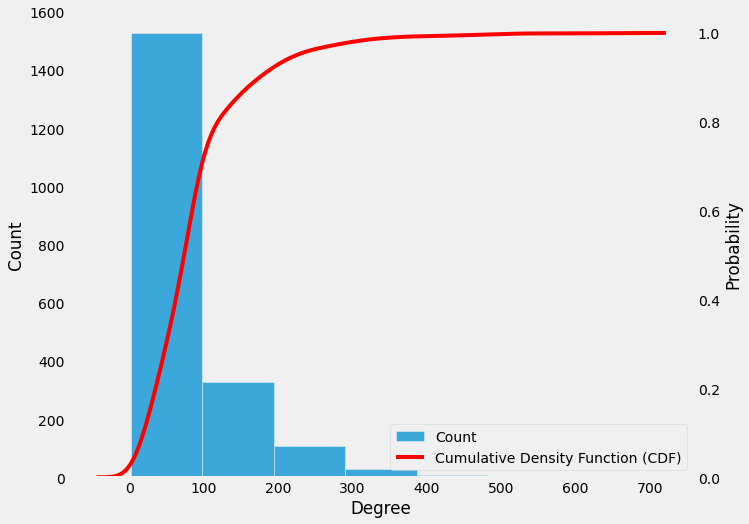

In [ ]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

Neste outro gráfico é possível observar que aproximadamente 90% dos nós da rede tem 200 de valor de grau ou menos.

## Análise Multivariada


In [ ]:
bc = pd.Series(betweenness_dict)
dc = pd.Series(degree_dict)
ec = pd.Series(eigenvector_dict)
cc = pd.Series(closeness_dict)

df = pd.DataFrame.from_dict({"Betweenness": bc,
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

,Betweenness,Degree,EigenVector,Closeness
0,0.000000,0.017937,0.008772,0.403904
1,0.001042,0.096163,0.046470,0.482684
2,0.004597,0.153463,0.065647,0.517668
3,0.003473,0.147484,0.065734,0.511859
4,0.000542,0.081216,0.041039,0.464799


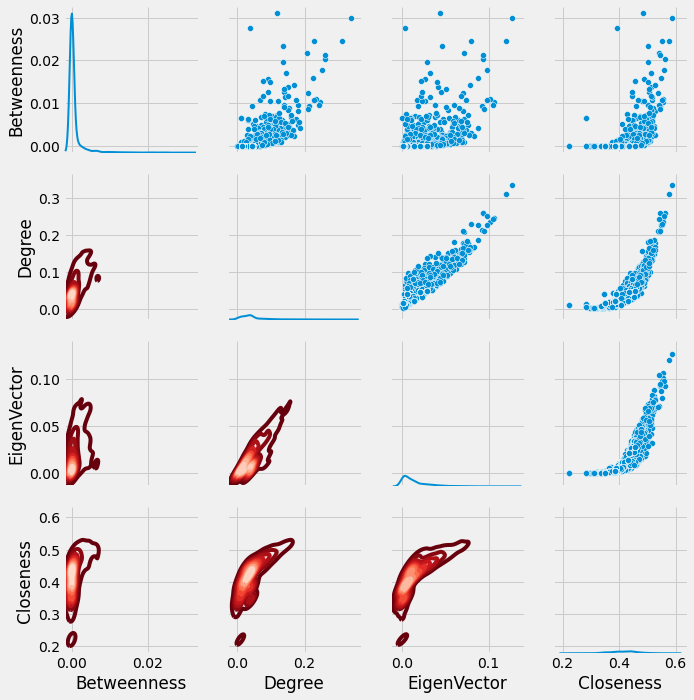

In [ ]:
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

Analisando um pouco o gráfico acima é possível ver que algumas métricas parecem ser proporcionais, como no caso de betweenness com closeness. Ao aumentar o betweenness o closeness também aumenta. Isso ocorre também nos casos de degree e closeness, eigenvector e closeness.

Não parece haver proporcionalidade ao analisar betweenness com degree e ao analisar betweenness com eigenvector

### Análise Decomposição da Rede

O método core_number retorna um dicionário, neste caso só pegamos os valores. 

Um k-core de um grafo G é um subgrafo máximo conectado de G no qual todos os vértices têm grau pelo menos k. Equivalentemente, é um dos componentes conexos do subgrafo de G formado pela exclusão repetida de todos os vértices de grau menor que k. 

O k-core 2, por exemplo, é um subgrafo da rede onde cada nó tem pelo menos 10 vizinhos. O k-core máximo dessa rede foi 105, onde cada nó nesse subgrafo tem pelo menos 105 vizinhos, esses nós são o núcleo da rede pois é o último k-core.

In [ ]:
set([v for k,v in nx.core_number(g).items()])

{2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 36,
 37,
 38,
 39,
 41,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 85,
 86,
 89,
 96,
 97,
 105}

Nós do núcleo da rede:

In [ ]:
list(nx.k_shell(g, 105))

['Avicii',
 'The Naked And Famous',
 'Tiësto',
 'Thomas Rhett',
 'Zac Brown Band',
 'Adele',
 'Johnnyswim',
 'Rodney Atkins',
 'R. City',
 'Michael Franti & Spearhead',
 'Easton Corbin',
 'Judah & the Lion',
 'Josh Turner',
 'Jason Mraz',
 'The Head and the Heart',
 'Bob Dylan',
 'Parachute',
 'Switchfoot',
 'Sheppard',
 'Fetty Wap',
 'Luke Bryan',
 'Andy Grammer',
 'Ella Henderson',
 'gnash',
 'Billy Crudup',
 'Kip Moore',
 'Dan + Shay',
 'Lukas Graham',
 'Yusuf / Cat Stevens',
 'Ruth B.',
 'Tyler Farr',
 'Silentó',
 'Lady Antebellum',
 'Hunter Hayes',
 'Brooks & Dunn',
 'Brett Eldredge',
 'Paramore',
 'Hawk Nelson',
 'Niall Horan',
 'Edward Sharpe & The Magnetic Zeros',
 'Charlie Puth',
 'Brad Paisley',
 'Ben Rector',
 'A Thousand Horses',
 'Old Crow Medicine Show',
 'Twenty One Pilots',
 'Jason Derulo',
 'Jon Bellion',
 'X Ambassadors',
 'A Day To Remember',
 'Rihanna',
 'Keith Urban',
 'Aaron Lewis',
 'Sleeping With Sirens',
 'Little Big Town',
 'The Chainsmokers',
 'T-Wayne',
 'Ze

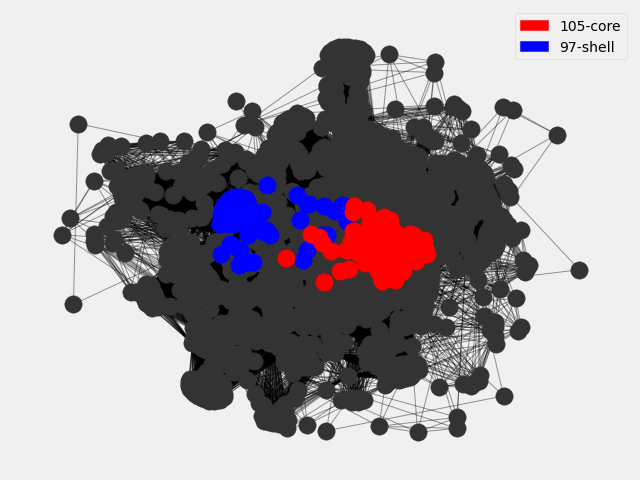

In [ ]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# Find k-cores
g_core_97 = nx.k_shell(g, 97)
g_core_105 = nx.k_core(g, 105)

# layout position
pos = nx.spring_layout(g, seed=123456789, k=0.3)

# draw edges
nx.draw_networkx_edges(g,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(g,
                               pos=pos,
                               node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(g_core_97,
                               pos=pos,
                               node_color="blue")

nodes = nx.draw_networkx_nodes(g_core_105,
                               pos=pos,
                               node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='105-core')
blue_patch = mpatches.Patch(color='blue', label='97-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core.png', transparent=True, dpi=600)
plt.show()

Colorindo o núcleo da rede de vermelho (105-core) e a "casca" do núcleo de azul (97-shell), k-core anterior ao núcleo.

In [ ]:
nx.write_graphml(g, "spotify.graphml")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>